# Project - Predicting census income dataset using classification algorithms

In this notebook I try to apply the classification algorithms such as K Nearest Neighbor(KNN), Decision Tree, Support Vector Machine and Logistic Regression, and find the best one for this specific dataset by accuracy evaluation methods. 


In [1]:
# Setup
#Before we get the data and start exploring it, let's download all the libraries that we will need.

import itertools
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

<h2>Reading the data set and adding the related headers.</h2>

 Python list <b>headers</b> containing name of headers 

In [2]:
headers = ["Age","workclass","fnlwgt","education","education-num", "marital-status","occupation",
         "relationship","race","Gender", "capital-gain","capital-loss","hours-per-week","native-country","Income"]


## About the census income dataset
This dataset is about census income and the goal is to predict whether income exceeds $50K/yr based on census data. The data set includes details of 15 variables and 32560 records whose income are greater than 50k per year in us dollars or less. 
The dataset doesn't contains header row, so the list of column names to use is passed explicitly. Set the parameter "names" equal to the Python list "headers". The dataset is loaded using Pandas library.

In [3]:
df = pd.read_excel(r"C:\Users\abera\Desktop\project\section_3\census_income_dataset.xlsx", names = headers)


In [4]:
# To see what the data set looks like, we'll use the head() method to display the first five rows of the dataframe.
df.head()

,Age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,Gender,capital-gain,capital-loss,hours-per-week,native-country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


## Data visualization and pre-processing

Let’s see how many of each income category is in our data set

In [5]:
df['Income'].value_counts()


 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

24719 people earn less than or eaqual to 50k anually while 7841 earn greater than 50k in us dollars.  

Lets plot some columns to underestand data better:

When looking at the following histograms the first histogram compares the number of hours work for female and male. It seems that men work more hours than women and another information we can obtain from this graph is that those who earn less than 50k work more hours per week compared to those who earn more than 50k anually.



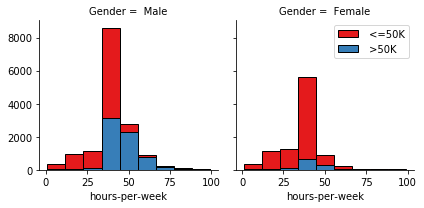

In [6]:
bins = np.linspace(df['hours-per-week'].min(), df['hours-per-week'].max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="Income", palette="Set1", col_wrap=2)
g.map(plt.hist, 'hours-per-week', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

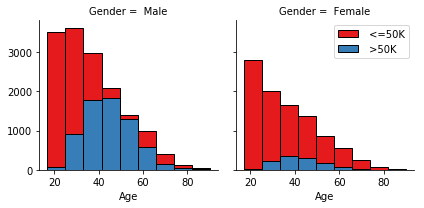

In [7]:
bins = np.linspace(df.Age.min(), df.Age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="Income", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Scatter plot of Capital gain versus educational level
We can show the distribution of Capital gain using a scatter plot; the Y-axis indicates Capital gain and the X-axis shows the educational level. A scatter plot is a useful method of comparing the relationship between two variables. There seems to be no pattern between these two variables and hence these variables are not related. 

Text(0, 0.5, 'Capital gain')

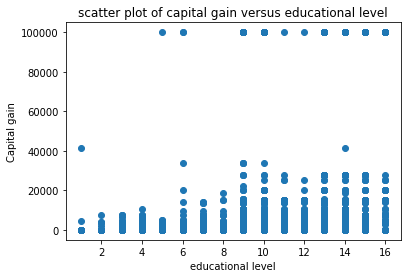

In [18]:
plt.scatter(df["education-num"], df["capital-gain"])
plt.title("scatter plot of capital gain versus educational level")
plt.xlabel("educational level")
plt.ylabel("Capital gain")

## The correlation matrix in order to see if the independent variables are correlated to each other and we can assess later the issue of multicollinearity.

In [17]:
df[['Age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']].corr()

,Age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
Age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,-0.043159,0.000437,-0.010259,-0.018770
education-num,0.036527,-0.043159,1.000000,0.122627,0.079932,0.148127
capital-gain,0.077674,0.000437,0.122627,1.000000,-0.031614,0.078409
capital-loss,0.057775,-0.010259,0.079932,-0.031614,1.000000,0.054256
hours-per-week,0.068756,-0.018770,0.148127,0.078409,0.054256,1.000000


# Pre-processing: Feature selection/extraction

### Convert Categorical features to numerical values¶


Lets look at the variable Gender:


In [19]:
df.groupby(['Gender'])['Income'].value_counts(normalize=True)

Gender   Income
 Female   <=50K    0.890539
          >50K     0.109461
 Male     <=50K    0.694249
          >50K     0.305751
Name: Income, dtype: float64

89 % of female earn under 50k while only 69 % of males earn bellow 50k anually. Conversely around 30 percent of males earn more than 50k but only 10 percent of females earn above 50k anually.



Lets convert male to 0 and female to 1:

In [20]:
df['gender'] = np.where(df['Gender'].str.contains('Female'), 1, 0)


In [21]:
df = df.drop(['Gender'], axis=1)
df.head()

,Age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,capital-gain,capital-loss,hours-per-week,native-country,Income,gender
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,0,0,13,United-States,<=50K,0
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,0,0,40,United-States,<=50K,0
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,0,0,40,United-States,<=50K,0
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,40,Cuba,<=50K,1
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,0,0,40,United-States,<=50K,1


Lets convert <=50k to 0 and >50k to 1:


In [22]:
df['income'] = np.where(df['Income'].str.contains('>50K'), 1, 0)


In [23]:
df = df.drop(['Income'], axis=1)
df.head()

,Age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,capital-gain,capital-loss,hours-per-week,native-country,gender,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,0,0,13,United-States,0,0
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,0,0,40,United-States,0,0
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,0,0,40,United-States,0,0
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,40,Cuba,1,0
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,0,0,40,United-States,1,0


## One Hot Encoding  
### How about race?

In [30]:
df.groupby(['race'])['income'].value_counts(normalize=True)


race                 income
 Amer-Indian-Eskimo  0         0.884244
                     1         0.115756
 Asian-Pac-Islander  0         0.734360
                     1         0.265640
 Black               0         0.876120
                     1         0.123880
 Other               0         0.907749
                     1         0.092251
 White               0         0.744131
                     1         0.255869
Name: income, dtype: float64

### Feature before One Hot Encoding

In [31]:
df[['Age','fnlwgt','education-num','capital-gain','capital-loss','hours-per-week','gender','race']].head()


,Age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,gender,race
0,50,83311,13,0,0,13,0,White
1,38,215646,9,0,0,40,0,White
2,53,234721,7,0,0,40,0,Black
3,28,338409,13,0,0,40,1,Black
4,37,284582,14,0,0,40,1,White


### Use one hot encoding technique to convert categorical variables to binary variables and append them to the feature Data Frame

In [32]:
Feature = df[['Age','fnlwgt','education-num','capital-gain','capital-loss','hours-per-week','gender']]
Feature = pd.concat([Feature,pd.get_dummies(df['race'])], axis=1)
Feature.head()


,Age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,gender,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White
0,50,83311,13,0,0,13,0,0,0,0,0,1
1,38,215646,9,0,0,40,0,0,0,0,0,1
2,53,234721,7,0,0,40,0,0,0,1,0,0
3,28,338409,13,0,0,40,1,0,0,1,0,0
4,37,284582,14,0,0,40,1,0,0,0,0,1


### Feature selection
#### Lets define feature sets, X:

In [34]:
X = Feature
X[0:5]

,Age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,gender,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White
0,50,83311,13,0,0,13,0,0,0,0,0,1
1,38,215646,9,0,0,40,0,0,0,0,0,1
2,53,234721,7,0,0,40,0,0,0,1,0,0
3,28,338409,13,0,0,40,1,0,0,1,0,0
4,37,284582,14,0,0,40,1,0,0,0,0,1


## The lables

In [35]:
y = df['income'].values
y[0:20]

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1])

## Normalize Data
#### Data Standardization give data zero mean and unit variance (technically should be done after train test split )

In [36]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

C:\Users\abera\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int32, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\abera\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype uint8, int32, int64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


array([[ 0.83709708, -1.0087417 ,  1.13477863, -0.14591373, -0.21666301,
        -2.22212013, -0.70308748, -0.09820239, -0.18155482, -0.32577377,
        -0.09161305,  0.41302713],
       [-0.04264043,  0.24504633, -0.42002663, -0.14591373, -0.21666301,
        -0.03542999, -0.70308748, -0.09820239, -0.18155482, -0.32577377,
        -0.09161305,  0.41302713],
       [ 1.05703146,  0.42576955, -1.19742926, -0.14591373, -0.21666301,
        -0.03542999, -0.70308748, -0.09820239, -0.18155482,  3.06961483,
        -0.09161305, -2.42114848],
       [-0.77575502,  1.40814589,  1.13477863, -0.14591373, -0.21666301,
        -0.03542999,  1.42229812, -0.09820239, -0.18155482,  3.06961483,
        -0.09161305, -2.42114848],
       [-0.11595189,  0.89817009,  1.52347994, -0.14591373, -0.21666301,
        -0.03542999,  1.42229812, -0.09820239, -0.18155482, -0.32577377,
        -0.09161305,  0.41302713]])

# Classification

Now let us use the training set to build an accurate model. Then use the test set to report the accuracy of the model we should use the following algorithm:  

- K Nearest Neighbor(KNN)
- Decision Tree
- Support Vector Machine
- Logistic Regression
       

# K Nearest Neighbor(KNN)
Notice: we should find the best k to build the model with the best accuracy. We can split the dataset into train and test to find the best k.

### Train Test Split
Out of Sample Accuracy is the percentage of correct predictions that the model makes on data that the model has NOT been trained on. Doing a train and test on the same dataset will most likely have low out-of-sample accuracy, due to the likelihood of being over-fit.

It is important that our models have a high, out-of-sample accuracy, because the purpose of any model, of course, is to make correct predictions on unknown data. So how can we improve out-of-sample accuracy? One way is to use an evaluation approach called Train/Test Split. Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, we train with the training set and test with the testing set.

This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the data. It is more realistic for real world problems.

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (26048, 12) (26048,)
Test set: (6512, 12) (6512,)


### Import library
Classifier implementing the k-nearest neighbors vote.

In [38]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

K in KNN, is the number of nearest neighbors to examine. It is supposed to be specified by the User. So, how can we choose right value for K? The general solution is to reserve a part of our data for testing the accuracy of the model. Then chose k =1, use the training part for modeling, and calculate the accuracy of prediction using all samples in the test set. Repeat this process, increasing the k, and see which k is the best for the model.  
  
We can calculate the accuracy of KNN for different Ks.

In [39]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.76550983, 0.80804668, 0.79791155, 0.81557125, 0.8125    ,
       0.81787469, 0.81449631, 0.81848894, 0.81772113])

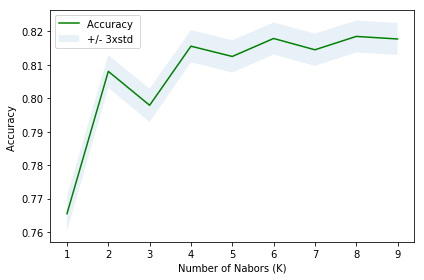

In [40]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [41]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)


The best accuracy was with 0.8184889434889435 with k= 8


## Training  
The KNN algorithm with k=8:

In [42]:
k = 8
#Train Model  
neigh = KNeighborsClassifier(n_neighbors = 6).fit(X,y)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=6, p=2,
           weights='uniform')

# Decision Tree

In [43]:
from sklearn.tree import DecisionTreeClassifier


In [44]:
loanTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
loanTree # it shows the default parameters

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

# Modeling

In [45]:
loanTree.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

# Support Vector Machine
The SVM algorithm offers a choice of kernel functions for performing its processing. Basically, mapping data into a higher dimensional space is called kernelling. The mathematical function used for the transformation is known as the kernel function, and can be of different types, such as:  
  
    1.Linear
    2.Polynomial
    3.Radial basis function (RBF)
    4.Sigmoid  
Each of these functions has its characteristics, its pros and cons, and its equation, but as there's no easy way of knowing which function performs best with any given dataset, we usually choose different functions in turn and compare the results. Therefore, the function linear is used for this particular dataset as the result is better compared to others.

In [46]:
import pylab as pl
import scipy.optimize as opt

In [47]:
from sklearn import svm
clf = svm.SVC(kernel='linear')
clf.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)


# Logistic Regression  
Some features for the modeling are selected. Also we changed the target data type to be integer, as it is a requirement by the Scikit learn algorithm.

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X,y)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

# Model Evaluation using Test set

In [49]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

## Predicting KNN  
we can use the model to predict the test set:

In [50]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([0, 0, 1, 0, 0])

## Accuracy evaluation  
In multilabel classification, accuracy classification score is a function that computes subset accuracy. This function is equal to the jaccard_similarity_score function. Essentially, it calculates how closely the actual labels and predicted labels are matched in the test set.

In [51]:
print("Test set Accuracy: ", jaccard_similarity_score(y_test, yhat))


Test set Accuracy:  0.8562653562653563


In [52]:
print("f1 score: ", f1_score(y_test, yhat, average='weighted'))

f1 score:  0.8427159056008295


## Predicting Decision Tree
Let's make some predictions on the testing dataset and store it into a variable called predTree.

In [53]:
predTree = loanTree.predict(X_test)


We can print out predTree and y_test if we want to visually compare the prediction to the actual values.


In [54]:

print (predTree [0:20])
print (y_test [0:20])

[0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1]
[0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0]


## Decision Tree Evaluation
Next, let's check the accuracy of our model.

In [55]:
print("Jaccard accuracy index", jaccard_similarity_score(y_test, predTree))

Jaccard accuracy index 0.820485257985258


In [56]:
f1_score(y_test, predTree, average='weighted')


0.8110387937199394

## Predicting SVM
After being fitted, the model can then be used to predict new values:

In [57]:
yhat_svm = clf.predict(X_test)
yhat_svm [0:5]

array([0, 0, 0, 0, 0])

## SVM Evaluation
We can also easily use the f1_score from sklearn library:

In [58]:
f1_score(y_test, yhat_svm, average='weighted')

0.7762622202498629

Lets try jaccard index for accuracy:


In [59]:
jaccard_similarity_score(y_test, yhat_svm)

0.8117321867321867

## Predicting Logistic Regression

In [60]:
Yhat_L = LR.predict(X_test)
Yhat_L

array([0, 0, 1, ..., 0, 0, 0])

predict_proba returns estimates for all classes, ordered by the label of classes. So, the first column is the probability of class 1, P(Y=1|X), and second column is probability of class 0, P(Y=0|X): 

In [61]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.95413291, 0.04586709],
       [0.93548663, 0.06451337],
       [0.20134697, 0.79865303],
       ...,
       [0.67916363, 0.32083637],
       [0.83442264, 0.16557736],
       [0.96735323, 0.03264677]])

## Logistic Regression Evaluation  
#### jaccard index
Lets try jaccard index for accuracy evaluation. we can define jaccard as the size of the intersection divided by the size of the union of two label sets. If the entire set of predicted labels for a sample strictly match with the true set of labels, then the subset accuracy is 1.0; otherwise it is 0.0.

In [62]:
jaccard_similarity_score(y_test, Yhat_L)

0.8203316953316954

### confusion matrix  
Another way of looking at accuracy of classifier is to look at confusion matrix.

In [63]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, Yhat_L, labels=[1,0]))

[[ 649  894]
 [ 276 4693]]


Confusion matrix, without normalization
[[ 649  894]
 [ 276 4693]]


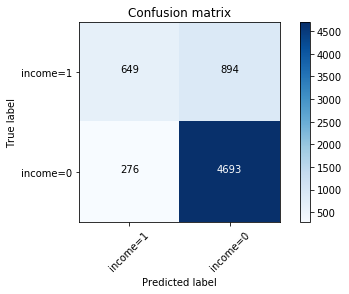

In [64]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, Yhat_L, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['income=1','income=0'],normalize= False,  title='Confusion matrix')

## F1 Score

In [65]:
print (classification_report(y_test, Yhat_L))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4969
           1       0.70      0.42      0.53      1543

   micro avg       0.82      0.82      0.82      6512
   macro avg       0.77      0.68      0.71      6512
weighted avg       0.81      0.82      0.80      6512



In [66]:
# We can also easily use the f1_score from sklearn library:
f1_score(y_test, Yhat_L, average='weighted')


0.8030960894406097

## log loss
Now, lets try log loss for evaluation. In logistic regression, the output can be the probability of income equal to 1. This probability is a value between 0 and 1. Log loss( Logarithmic loss) measures the performance of a classifier where the predicted output is a probability value between 0 and 1.

In [67]:
log_loss(y_test, yhat_prob)

0.39011399522391965

## Conclusion:
Based on the above accuracy evaluation methods for this specific dataset, KNN algorithm is found to be the best one as it has the highest Jaccard index (Jaccard index=0.85626). The higher the Jaccard index means the better the predicted labels for a sample match with the true set of labels. If the entire set of predicted labels for a sample strictly match with the true set of labels, then the subset accuracy is 1.0; otherwise it is 0.0.